This is taken mostly from the Herbie [github page](https://github.com/blaylockbk/Herbie/tree/main/herbie/models) with more keyword argument exposed. Also, very high level investigation into the regex expressions permitted. 

In [1]:
import herbie
import xarray as xr

In [2]:
from herbie import Herbie
from pathlib import Path

H = Herbie('2021-01-01 08:00',
           model='hrrr',
           product='prs',
           overwrite=True,
           verbose=True,
           save_dir=Path('./herbie-data')
           )

✅ Found ┊ model=hrrr ┊ product=prs ┊ 2021-Jan-01 08:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
print(H.searchString_help)


Use regular expression to search for lines in the index file.
Here are some examples you can use for the wgrib2-style `searchString`

    ============================= ===============================================
    ``searchString=``             Messages that will be downloaded
    ============================= ===============================================
    ":TMP:2 m"                    Temperature at 2 m.
    ":TMP:"                       Temperature fields at all levels.
    ":UGRD:.* mb"                 U Wind at all pressure levels.
    ":500 mb:"                    All variables on the 500 mb level.
    ":APCP:"                      All accumulated precipitation fields.
    ":APCP:surface:0-[1-9]*"      Accumulated precip since initialization time
    ":APCP:surface:[1-9]*-[1-9]*" Accumulated precip over last hour
    ":UGRD:10 m"                  U wind component at 10 meters.
    ":(U|V)GRD:(10|80) m"         U and V wind component at 10 and 80 m.
    ":(U|V)GRD:"     

Level short names: https://mesowest.utah.edu/html/hrrr/zarr_documentation/html/zarr_variables.html

In [4]:
p = H.download(":(SPFH|PRES|TMP|HGT):")
p

/Users/cmarshak/opt/anaconda3/envs/herbie/lib/python3.10/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


PosixPath('/Users/cmarshak/bekaert-team/HRRR-io/herbie-data/hrrr/20210101/subset_8def1d85__hrrr.t08z.wrfprsf00.grib2')

In [5]:
ds = xr.open_dataset(p, filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
ds

Ignoring index file '/Users/cmarshak/bekaert-team/HRRR-io/herbie-data/hrrr/20210101/subset_8def1d85__hrrr.t08z.wrfprsf00.grib2.923a8.idx' older than GRIB file


<xarray.Dataset>
Dimensions:        (isobaricInhPa: 40, y: 1059, x: 1799)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1.013e+03 1e+03 975.0 ... 75.0 50.0
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    gh             (isobaricInhPa, y, x) float32 ...
    t              (isobaricInhPa, y, x) float32 ...
    q              (isobaricInhPa, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2022-11-02T18:07 GRIB to CDM+CF via cfgrib-0.9.1...

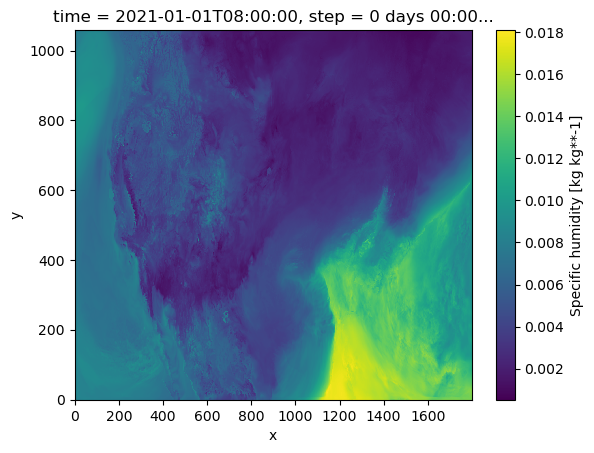

In [6]:
d = ds.isobaricInhPa.data
ds.sel(isobaricInhPa=d[0])['q'].plot()